# Adopt a Buddy

- In this competition, we have to predict the breed_category and pet_category of pets from available features
- This is multilabel classification problem

### Description of Competiton
<img src="competition_description.png" style="width:800px;height:650px;">

In [1]:
import pandas as pd
import numpy as np
import pycaret

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [4]:
train['pet_id'].value_counts()

ANSL_60284    1
ANSL_76198    1
ANSL_50116    1
ANSL_70333    1
ANSL_63859    1
             ..
ANSL_61034    1
ANSL_68844    1
ANSL_68635    1
ANSL_60304    1
ANSL_52443    1
Name: pet_id, Length: 18834, dtype: int64

In [5]:
"""
Making new features from pet_id column
"""
train['n1_pet_id'] = train['pet_id'].str[:6]
train['n2_pet_id'] = train['pet_id'].str[:7]

In [6]:
train['n1_pet_id'].nunique()

4

In [7]:
train['n1_pet_id'].value_counts()

ANSL_6    7005
ANSL_5    6999
ANSL_7    4813
ANSL_4      17
Name: n1_pet_id, dtype: int64

In [8]:
train['n2_pet_id'].value_counts()

ANSL_61    739
ANSL_70    715
ANSL_52    714
ANSL_60    714
ANSL_55    712
ANSL_59    708
ANSL_73    708
ANSL_58    708
ANSL_72    705
ANSL_62    703
ANSL_51    702
ANSL_67    702
ANSL_56    700
ANSL_63    700
ANSL_54    699
ANSL_64    699
ANSL_57    699
ANSL_75    699
ANSL_66    695
ANSL_65    692
ANSL_68    691
ANSL_50    689
ANSL_74    682
ANSL_71    677
ANSL_69    670
ANSL_53    668
ANSL_76    627
ANSL_49     17
Name: n2_pet_id, dtype: int64

In [9]:
train.drop("pet_id", inplace=True, axis=1)  #Dropping the pet_id from the dataset since its major importance is already transfered

In [10]:
train.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,n1_pet_id,n2_pet_id
0,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,ANSL_6,ANSL_69
1,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,ANSL_6,ANSL_66
2,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,ANSL_6,ANSL_69
3,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,ANSL_7,ANSL_71
4,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,ANSL_5,ANSL_57


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   issue_date      18834 non-null  object 
 1   listing_date    18834 non-null  object 
 2   condition       17357 non-null  float64
 3   color_type      18834 non-null  object 
 4   length(m)       18834 non-null  float64
 5   height(cm)      18834 non-null  float64
 6   X1              18834 non-null  int64  
 7   X2              18834 non-null  int64  
 8   breed_category  18834 non-null  float64
 9   pet_category    18834 non-null  int64  
 10  n1_pet_id       18834 non-null  object 
 11  n2_pet_id       18834 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.7+ MB


In [12]:
"""
Since the dates type is in object, we have to convert it to datetime
"""
train['issue_date'] = pd.to_datetime(train['issue_date'])
train['listing_date'] = pd.to_datetime(train['listing_date'])

In [13]:
train.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,n1_pet_id,n2_pet_id
0,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,ANSL_6,ANSL_69
1,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2,ANSL_6,ANSL_66
2,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4,ANSL_6,ANSL_69
3,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2,ANSL_7,ANSL_71
4,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1,ANSL_5,ANSL_57


In [14]:
# The length is in meter. So it must be converted to cm for making similar range of values between length and height
train['length(cm)'] = train['length(m)']*100
train.drop('length(m)', axis=1, inplace=True)

In [15]:
train.head()

,issue_date,listing_date,condition,color_type,height(cm),X1,X2,breed_category,pet_category,n1_pet_id,n2_pet_id,length(cm)
0,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,7.78,13,9,0.0,1,ANSL_6,ANSL_69,80.0
1,2013-11-21,2018-12-27 17:47:00,1.0,White,14.19,13,9,0.0,2,ANSL_6,ANSL_66,72.0
2,2014-09-28,2016-10-19 08:24:00,NaN,Brown,40.90,15,4,2.0,4,ANSL_6,ANSL_69,15.0
3,2016-12-31,2019-01-25 18:30:00,1.0,White,17.82,0,1,0.0,2,ANSL_7,ANSL_71,62.0
4,2017-09-28,2017-11-19 09:38:00,2.0,Black,11.06,18,4,0.0,1,ANSL_5,ANSL_57,50.0


In [16]:
# Lets check whether length values are 0 or not
len(train[train['length(cm)']==0])

93

#### 93 values of length is 0, which is completely senseless since no any pet will have length 0 in reality

In [17]:
len(train[train['height(cm)']==0])

0

In [18]:
val = train['length(cm)'].mean()
train['length(cm)'].replace(0,val, inplace=True)  #replacing 0 length values with mean og lengths

In [19]:
len(train[train['length(cm)']==0])

0

In [20]:
train['pet_category'].value_counts()  #counting values of each pet_category

2    10621
1     7184
4      941
0       88
Name: pet_category, dtype: int64

In [21]:
train['breed_category'].value_counts()  #counting values of each breed_category

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64

In [22]:
train["X1"].value_counts()

0     10752
13     4280
7      1460
16      603
15      554
18      548
17      260
9       106
12       64
11       53
1        51
8        46
2        24
6        11
4         7
10        6
19        3
5         3
14        2
3         1
Name: X1, dtype: int64

In [23]:
train["X2"].value_counts()

1    8493
9    5144
7    3608
4    1263
2     183
3      64
8      58
5      12
6       5
0       4
Name: X2, dtype: int64

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   issue_date      18834 non-null  datetime64[ns]
 1   listing_date    18834 non-null  datetime64[ns]
 2   condition       17357 non-null  float64       
 3   color_type      18834 non-null  object        
 4   height(cm)      18834 non-null  float64       
 5   X1              18834 non-null  int64         
 6   X2              18834 non-null  int64         
 7   breed_category  18834 non-null  float64       
 8   pet_category    18834 non-null  int64         
 9   n1_pet_id       18834 non-null  object        
 10  n2_pet_id       18834 non-null  object        
 11  length(cm)      18834 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(3), object(3)
memory usage: 1.7+ MB


In [25]:
train['ratio_len_height'] = train['length(cm)']/train['height(cm)']  #adding new feature for information gain

In [26]:
train.loc[train['listing_date'] < train['issue_date']]  #checking if lsiting date is smaller than issue_date

,issue_date,listing_date,condition,color_type,height(cm),X1,X2,breed_category,pet_category,n1_pet_id,n2_pet_id,length(cm),ratio_len_height
1504,2018-01-17,2018-01-14 15:13:00,2.0,Orange Tabby,43.19,13,9,0.0,1,ANSL_5,ANSL_52,72.0,1.667053
5301,2016-11-18,2016-09-03 17:01:00,0.0,Black,27.82,0,1,1.0,1,ANSL_6,ANSL_63,88.0,3.163192


- As seen above, there are 2 values in which the listing date is smaller than issue_date

In [27]:
train.drop([1504, 5301], axis=0, inplace=True)  #droping those values

In [28]:
train.loc[train['listing_date'] < train['issue_date']]

,issue_date,listing_date,condition,color_type,height(cm),X1,X2,breed_category,pet_category,n1_pet_id,n2_pet_id,length(cm),ratio_len_height


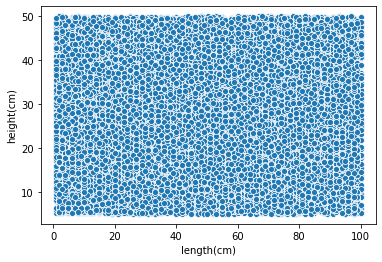

In [29]:
import seaborn as sns
sns.scatterplot(train['length(cm)'], train['height(cm)'])

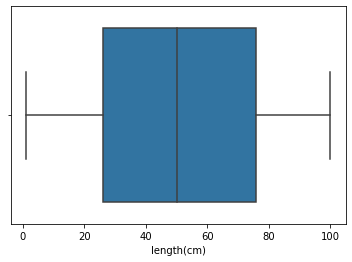

In [30]:
#Checking the distribution of data of length column
sns.boxplot(train['length(cm)'])

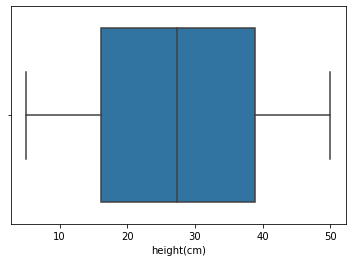

In [31]:
sns.boxplot(train['height(cm)'])

In [32]:
train['date_diff'] = train['listing_date'] - train['issue_date']

In [33]:
train.head()

,issue_date,listing_date,condition,color_type,height(cm),X1,X2,breed_category,pet_category,n1_pet_id,n2_pet_id,length(cm),ratio_len_height,date_diff
0,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,7.78,13,9,0.0,1,ANSL_6,ANSL_69,80.0,10.282776,73 days 16:25:00
1,2013-11-21,2018-12-27 17:47:00,1.0,White,14.19,13,9,0.0,2,ANSL_6,ANSL_66,72.0,5.073996,1862 days 17:47:00
2,2014-09-28,2016-10-19 08:24:00,NaN,Brown,40.90,15,4,2.0,4,ANSL_6,ANSL_69,15.0,0.366748,752 days 08:24:00
3,2016-12-31,2019-01-25 18:30:00,1.0,White,17.82,0,1,0.0,2,ANSL_7,ANSL_71,62.0,3.479237,755 days 18:30:00
4,2017-09-28,2017-11-19 09:38:00,2.0,Black,11.06,18,4,0.0,1,ANSL_5,ANSL_57,50.0,4.520796,52 days 09:38:00


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18832 entries, 0 to 18833
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   issue_date        18832 non-null  datetime64[ns] 
 1   listing_date      18832 non-null  datetime64[ns] 
 2   condition         17355 non-null  float64        
 3   color_type        18832 non-null  object         
 4   height(cm)        18832 non-null  float64        
 5   X1                18832 non-null  int64          
 6   X2                18832 non-null  int64          
 7   breed_category    18832 non-null  float64        
 8   pet_category      18832 non-null  int64          
 9   n1_pet_id         18832 non-null  object         
 10  n2_pet_id         18832 non-null  object         
 11  length(cm)        18832 non-null  float64        
 12  ratio_len_height  18832 non-null  float64        
 13  date_diff         18832 non-null  timedelta64[ns]
dtypes: dat

In [35]:
test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pet_id        8072 non-null   object 
 1   issue_date    8072 non-null   object 
 2   listing_date  8072 non-null   object 
 3   condition     7453 non-null   float64
 4   color_type    8072 non-null   object 
 5   length(m)     8072 non-null   float64
 6   height(cm)    8072 non-null   float64
 7   X1            8072 non-null   int64  
 8   X2            8072 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 567.7+ KB


In [37]:
"""
Making new features from the pet_id column of test set
"""
test['n1_pet_id'] = test['pet_id'].str[:6]
test['n2_pet_id'] = test['pet_id'].str[:7]

In [38]:
"""
changing the date columns object types to datetime types
"""
test['issue_date'] = pd.to_datetime(test['issue_date'])
test['listing_date'] = pd.to_datetime(test['listing_date'])

In [39]:
len(test[test['length(m)'] ==0])

44

In [40]:
# Since there are 44 0 length values, we will replace them with mean
val1 = test['length(m)'].mean()

In [41]:
test['length(m)'].replace(0,val1, inplace=True)

In [42]:
len(test[test['height(cm)'] ==0])

0

In [43]:
test['length(cm)'] = test['length(m)']*100  #converting m to cm
test.drop('length(m)', inplace=True, axis=1)

In [44]:
train.head()

,issue_date,listing_date,condition,color_type,height(cm),X1,X2,breed_category,pet_category,n1_pet_id,n2_pet_id,length(cm),ratio_len_height,date_diff
0,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,7.78,13,9,0.0,1,ANSL_6,ANSL_69,80.0,10.282776,73 days 16:25:00
1,2013-11-21,2018-12-27 17:47:00,1.0,White,14.19,13,9,0.0,2,ANSL_6,ANSL_66,72.0,5.073996,1862 days 17:47:00
2,2014-09-28,2016-10-19 08:24:00,NaN,Brown,40.90,15,4,2.0,4,ANSL_6,ANSL_69,15.0,0.366748,752 days 08:24:00
3,2016-12-31,2019-01-25 18:30:00,1.0,White,17.82,0,1,0.0,2,ANSL_7,ANSL_71,62.0,3.479237,755 days 18:30:00
4,2017-09-28,2017-11-19 09:38:00,2.0,Black,11.06,18,4,0.0,1,ANSL_5,ANSL_57,50.0,4.520796,52 days 09:38:00


In [45]:
test.head()

,pet_id,issue_date,listing_date,condition,color_type,height(cm),X1,X2,n1_pet_id,n2_pet_id,length(cm)
0,ANSL_75005,2005-08-17,2017-09-07 15:35:00,0.0,Black,42.73,0,7,ANSL_7,ANSL_75,87.0
1,ANSL_76663,2018-11-15,2019-05-08 17:24:00,1.0,Orange Tabby,6.71,0,1,ANSL_7,ANSL_76,6.0
2,ANSL_58259,2012-10-11,2018-04-02 16:51:00,1.0,Black,41.21,0,7,ANSL_5,ANSL_58,24.0
3,ANSL_67171,2015-02-13,2018-04-06 07:25:00,1.0,Black,8.46,7,1,ANSL_6,ANSL_67,29.0
4,ANSL_72871,2017-01-18,2018-04-26 13:42:00,1.0,Brown,30.92,0,7,ANSL_7,ANSL_72,71.0


In [46]:
pet_id = list(test['pet_id'])  #extracting pet_id from test for submission
pet_id

['ANSL_75005',
 'ANSL_76663',
 'ANSL_58259',
 'ANSL_67171',
 'ANSL_72871',
 'ANSL_64886',
 'ANSL_73798',
 'ANSL_53131',
 'ANSL_66674',
 'ANSL_55165',
 'ANSL_74518',
 'ANSL_72217',
 'ANSL_55812',
 'ANSL_55318',
 'ANSL_65677',
 'ANSL_74873',
 'ANSL_56546',
 'ANSL_76135',
 'ANSL_64881',
 'ANSL_73262',
 'ANSL_69908',
 'ANSL_76469',
 'ANSL_65785',
 'ANSL_74284',
 'ANSL_58262',
 'ANSL_75383',
 'ANSL_61707',
 'ANSL_74942',
 'ANSL_69155',
 'ANSL_66305',
 'ANSL_72637',
 'ANSL_55160',
 'ANSL_73057',
 'ANSL_68887',
 'ANSL_74196',
 'ANSL_56430',
 'ANSL_66634',
 'ANSL_67159',
 'ANSL_62734',
 'ANSL_70979',
 'ANSL_61168',
 'ANSL_58061',
 'ANSL_55940',
 'ANSL_76291',
 'ANSL_69273',
 'ANSL_70508',
 'ANSL_51062',
 'ANSL_57908',
 'ANSL_52712',
 'ANSL_70808',
 'ANSL_75816',
 'ANSL_63870',
 'ANSL_53866',
 'ANSL_75449',
 'ANSL_76504',
 'ANSL_71397',
 'ANSL_67333',
 'ANSL_59503',
 'ANSL_74843',
 'ANSL_72388',
 'ANSL_56183',
 'ANSL_61540',
 'ANSL_76621',
 'ANSL_68225',
 'ANSL_68150',
 'ANSL_69330',
 'ANSL_608

In [47]:
test.drop('pet_id', inplace=True, axis=1)

In [48]:
test['ratio_len_height'] = test['length(cm)']/test['height(cm)']

In [49]:
test['date_diff'] = test['listing_date'] - test['issue_date']

In [50]:
test.head()

,issue_date,listing_date,condition,color_type,height(cm),X1,X2,n1_pet_id,n2_pet_id,length(cm),ratio_len_height,date_diff
0,2005-08-17,2017-09-07 15:35:00,0.0,Black,42.73,0,7,ANSL_7,ANSL_75,87.0,2.036040,4404 days 15:35:00
1,2018-11-15,2019-05-08 17:24:00,1.0,Orange Tabby,6.71,0,1,ANSL_7,ANSL_76,6.0,0.894188,174 days 17:24:00
2,2012-10-11,2018-04-02 16:51:00,1.0,Black,41.21,0,7,ANSL_5,ANSL_58,24.0,0.582383,1999 days 16:51:00
3,2015-02-13,2018-04-06 07:25:00,1.0,Black,8.46,7,1,ANSL_6,ANSL_67,29.0,3.427896,1148 days 07:25:00
4,2017-01-18,2018-04-26 13:42:00,1.0,Brown,30.92,0,7,ANSL_7,ANSL_72,71.0,2.296248,463 days 13:42:00


In [51]:
"""
    Since date_diff values are in days and timestamp,
    We will only extract the days values
"""

train['date_diff']=train['date_diff'].dt.components['days']

In [52]:
test['date_diff']=test['date_diff'].dt.components['days'] #Same process for test set

In [53]:
#Adding a new feature, so taht model can generalize well on test sets
train['dpr'] = train['date_diff']/train['ratio_len_height']
test['dpr'] = test['date_diff']/test['ratio_len_height']

In [54]:
test.head()

,issue_date,listing_date,condition,color_type,height(cm),X1,X2,n1_pet_id,n2_pet_id,length(cm),ratio_len_height,date_diff,dpr
0,2005-08-17,2017-09-07 15:35:00,0.0,Black,42.73,0,7,ANSL_7,ANSL_75,87.0,2.036040,4404,2163.022069
1,2018-11-15,2019-05-08 17:24:00,1.0,Orange Tabby,6.71,0,1,ANSL_7,ANSL_76,6.0,0.894188,174,194.590000
2,2012-10-11,2018-04-02 16:51:00,1.0,Black,41.21,0,7,ANSL_5,ANSL_58,24.0,0.582383,1999,3432.449583
3,2015-02-13,2018-04-06 07:25:00,1.0,Black,8.46,7,1,ANSL_6,ANSL_67,29.0,3.427896,1148,334.899310
4,2017-01-18,2018-04-26 13:42:00,1.0,Brown,30.92,0,7,ANSL_7,ANSL_72,71.0,2.296248,463,201.633239


In [55]:
train.head()

,issue_date,listing_date,condition,color_type,height(cm),X1,X2,breed_category,pet_category,n1_pet_id,n2_pet_id,length(cm),ratio_len_height,date_diff,dpr
0,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,7.78,13,9,0.0,1,ANSL_6,ANSL_69,80.0,10.282776,73,7.099250
1,2013-11-21,2018-12-27 17:47:00,1.0,White,14.19,13,9,0.0,2,ANSL_6,ANSL_66,72.0,5.073996,1862,366.969167
2,2014-09-28,2016-10-19 08:24:00,NaN,Brown,40.90,15,4,2.0,4,ANSL_6,ANSL_69,15.0,0.366748,752,2050.453333
3,2016-12-31,2019-01-25 18:30:00,1.0,White,17.82,0,1,0.0,2,ANSL_7,ANSL_71,62.0,3.479237,755,217.001613
4,2017-09-28,2017-11-19 09:38:00,2.0,Black,11.06,18,4,0.0,1,ANSL_5,ANSL_57,50.0,4.520796,52,11.502400


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   issue_date        8072 non-null   datetime64[ns]
 1   listing_date      8072 non-null   datetime64[ns]
 2   condition         7453 non-null   float64       
 3   color_type        8072 non-null   object        
 4   height(cm)        8072 non-null   float64       
 5   X1                8072 non-null   int64         
 6   X2                8072 non-null   int64         
 7   n1_pet_id         8072 non-null   object        
 8   n2_pet_id         8072 non-null   object        
 9   length(cm)        8072 non-null   float64       
 10  ratio_len_height  8072 non-null   float64       
 11  date_diff         8072 non-null   int64         
 12  dpr               8072 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(3), object(3)
memory usage: 819.9+ KB


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18832 entries, 0 to 18833
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   issue_date        18832 non-null  datetime64[ns]
 1   listing_date      18832 non-null  datetime64[ns]
 2   condition         17355 non-null  float64       
 3   color_type        18832 non-null  object        
 4   height(cm)        18832 non-null  float64       
 5   X1                18832 non-null  int64         
 6   X2                18832 non-null  int64         
 7   breed_category    18832 non-null  float64       
 8   pet_category      18832 non-null  int64         
 9   n1_pet_id         18832 non-null  object        
 10  n2_pet_id         18832 non-null  object        
 11  length(cm)        18832 non-null  float64       
 12  ratio_len_height  18832 non-null  float64       
 13  date_diff         18832 non-null  int64         
 14  dpr               1883

In [58]:
"""
Seperating dataset with pet target column and breed target column so that we can work on individual targets
"""
train_pet = train.drop("breed_category", axis=1) #pet dataset having only pet_category as target column
train_breed = train.drop("pet_category", axis=1)

In [59]:
train_pet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18832 entries, 0 to 18833
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   issue_date        18832 non-null  datetime64[ns]
 1   listing_date      18832 non-null  datetime64[ns]
 2   condition         17355 non-null  float64       
 3   color_type        18832 non-null  object        
 4   height(cm)        18832 non-null  float64       
 5   X1                18832 non-null  int64         
 6   X2                18832 non-null  int64         
 7   pet_category      18832 non-null  int64         
 8   n1_pet_id         18832 non-null  object        
 9   n2_pet_id         18832 non-null  object        
 10  length(cm)        18832 non-null  float64       
 11  ratio_len_height  18832 non-null  float64       
 12  date_diff         18832 non-null  int64         
 13  dpr               18832 non-null  float64       
dtypes: datetime64[ns](2), 

In [60]:
from pycaret.classification import *

## Classification for Breed Target

- We will be using <b>Pycaret</b> which is one of the most famous automation library for ML problems.
- Few lines of code can handle complex model comparision as well as data preprocessing steps
- It saves a lot of time

In [62]:
#setting up the environment for classification
blnd_breed_setup = setup(train_breed, "breed_category",categorical_features=["color_type","n1_pet_id","n2_pet_id"], high_cardinality_features=["color_type"], normalize=True,remove_outliers=True, remove_multicollinearity=True, fix_imbalance=True)

Setup Succesfully Completed!


,Description,Value
0,session_id,7840
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(18832, 14)"
4,Missing Values,True
5,Numeric Features,5
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,True
9,High Cardinality Method,frequency


In [63]:
blnd_breed_setup

(          condition  color_type  height(cm)  length(cm)  ratio_len_height  \
 0      1.509862e+00   -0.206215   -1.510641    1.029310          2.891186   
 1      1.576945e-01    0.260349   -1.018307    0.750094          0.929663   
 2      1.501208e-16   -0.142870    1.033212   -1.239325         -0.842993   
 3      1.576945e-01    0.260349   -0.739497    0.401073          0.329108   
 4      1.509862e+00    1.579640   -1.258714   -0.017752          0.721339   
 ...             ...         ...         ...         ...               ...   
 18829  1.509862e+00   -0.948088   -0.006757   -0.227165         -0.375492   
 18830  1.501208e-16   -0.142870   -1.013699    0.784996          0.948044   
 18831 -1.194473e+00   -1.226443    0.052384    1.692450          0.344223   
 18832 -1.194473e+00   -0.412088    1.334296    0.156758         -0.518990   
 18833 -1.194473e+00   -0.142870    0.764387    1.238723         -0.115170   
 
        date_diff       dpr  X1_0  X1_13  X1_15  ...  listing_

In [69]:
ada = create_model('ada')
gbc = create_model("gbc")
lgb = create_model("lightgbm")
xgb = create_model("xgboost")
blender_breed = blend_models(estimator_list = [ada, gbc, lgb, xgb], method = 'soft') #blending the above models

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8962,0.0000,0.9253,0.8962,0.8962,0.8161,0.8161
1,0.8978,0.0000,0.9260,0.8985,0.8977,0.8185,0.8192
2,0.9105,0.0000,0.9352,0.9110,0.9105,0.8411,0.8416
3,0.8978,0.0000,0.9264,0.8978,0.8978,0.8186,0.8186
4,0.8938,0.0000,0.9233,0.8940,0.8937,0.8114,0.8116
5,0.9026,0.0000,0.9299,0.9025,0.9025,0.8271,0.8271
6,0.8978,0.0000,0.9263,0.8978,0.8977,0.8185,0.8186
7,0.9089,0.0000,0.9343,0.9090,0.9089,0.8384,0.8384
8,0.9026,0.0000,0.9299,0.9026,0.9026,0.8271,0.8271
9,0.9065,0.0000,0.9331,0.9070,0.9066,0.8343,0.8346


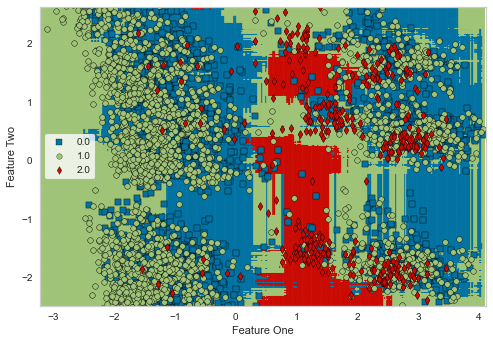

In [70]:
plot_model(blender_breed, 'boundary')

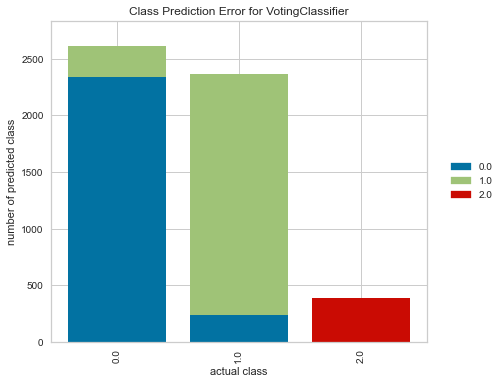

In [71]:
plot_model(blender_breed, 'error') #plotting model according to error

In [72]:
breed_final = finalize_model(blender_breed) #Fnalizing the model

In [73]:
breed_pred = predict_model(breed_final, data=test) #Predicting the values of test datasets

In [74]:
breed_pred

,issue_date,listing_date,condition,color_type,height(cm),X1,X2,n1_pet_id,n2_pet_id,length(cm),ratio_len_height,date_diff,dpr,Label
0,2005-08-17,2017-09-07 15:35:00,0.0,Black,42.73,0,7,ANSL_7,ANSL_75,87.0,2.036040,4404,2163.022069,1
1,2018-11-15,2019-05-08 17:24:00,1.0,Orange Tabby,6.71,0,1,ANSL_7,ANSL_76,6.0,0.894188,174,194.590000,0
2,2012-10-11,2018-04-02 16:51:00,1.0,Black,41.21,0,7,ANSL_5,ANSL_58,24.0,0.582383,1999,3432.449583,0
3,2015-02-13,2018-04-06 07:25:00,1.0,Black,8.46,7,1,ANSL_6,ANSL_67,29.0,3.427896,1148,334.899310,0
4,2017-01-18,2018-04-26 13:42:00,1.0,Brown,30.92,0,7,ANSL_7,ANSL_72,71.0,2.296248,463,201.633239,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,2016-02-10,2017-03-10 14:56:00,2.0,Brown,36.08,13,9,ANSL_6,ANSL_66,82.0,2.272727,394,173.360000,0
8068,2015-12-07,2018-02-12 00:00:00,0.0,Tan,27.54,13,9,ANSL_5,ANSL_59,49.0,1.779230,798,448.508571,1
8069,2015-12-08,2017-01-04 17:19:00,0.0,Black,37.19,0,7,ANSL_6,ANSL_60,98.0,2.635117,393,149.139490,1
8070,2016-06-28,2017-07-20 18:19:00,NaN,Black,23.83,0,2,ANSL_5,ANSL_58,79.0,3.315149,387,116.736835,2


In [75]:
breed_pred['Label'].value_counts() #Label column contains the actual predictions

0    3977
1    3476
2     619
Name: Label, dtype: int64

In [76]:
train['breed_category'].value_counts()

0.0    8999
1.0    8356
2.0    1477
Name: breed_category, dtype: int64

In [77]:
y_pred_breed = breed_pred['Label'].tolist() #converting Label series to list for submission

-----

## Classification for Pet target variable

In [78]:
#Setting up the environment
breed_pet_setup = setup(train_pet, "pet_category",categorical_features=["color_type","n1_pet_id","n2_pet_id"], high_cardinality_features=["color_type"], normalize=True,remove_outliers=True, remove_multicollinearity=True, fix_imbalance=True, feature_selection=True)

Setup Succesfully Completed!


,Description,Value
0,session_id,1022
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(18832, 14)"
4,Missing Values,True
5,Numeric Features,5
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,True
9,High Cardinality Method,frequency


In [79]:
breed_pet_setup

(       listing_date_month_6  issue_date_month_9  listing_date_weekday_4  \
 0                       0.0                 0.0                     0.0   
 1                       0.0                 0.0                     0.0   
 2                       0.0                 1.0                     0.0   
 3                       0.0                 0.0                     1.0   
 4                       0.0                 1.0                     0.0   
 ...                     ...                 ...                     ...   
 18829                   0.0                 0.0                     1.0   
 18830                   0.0                 0.0                     0.0   
 18831                   0.0                 0.0                     0.0   
 18832                   0.0                 0.0                     0.0   
 18833                   0.0                 0.0                     1.0   
 
        n2_pet_id_ANSL_59  X1_16  listing_date_weekday_6  issue_date_month_10  \
 0   

In [111]:
catboost_pet = create_model("catboost") #creating catboost model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8978,0.0000,0.6742,0.8993,0.8958,0.8015,0.8036
1,0.9034,0.0000,0.7086,0.9054,0.9017,0.8130,0.8158
2,0.9050,0.0000,0.6340,0.9031,0.9028,0.8160,0.8169
3,0.9050,0.0000,0.7595,0.9055,0.9039,0.8169,0.8182
4,0.9018,0.0000,0.7825,0.9024,0.9007,0.8099,0.8118
5,0.9018,0.0000,0.6663,0.9031,0.8993,0.8086,0.8112
6,0.9161,0.0000,0.7255,0.9164,0.9149,0.8392,0.8397
7,0.8962,0.0000,0.7439,0.8960,0.8954,0.8003,0.8012
8,0.8994,0.0000,0.6410,0.8972,0.8966,0.8047,0.8074
9,0.8970,0.0000,0.6982,0.8980,0.8954,0.8009,0.8023


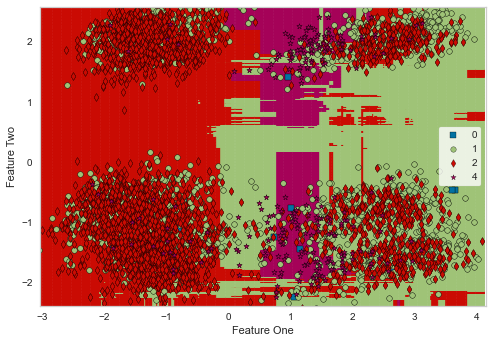

In [112]:
plot_model(catboost_pet, 'boundary') #Plotting model according to boundary curve

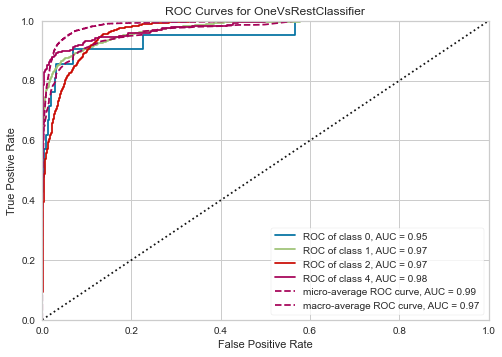

In [113]:
plot_model(catboost_pet, 'auc') #AUC curve

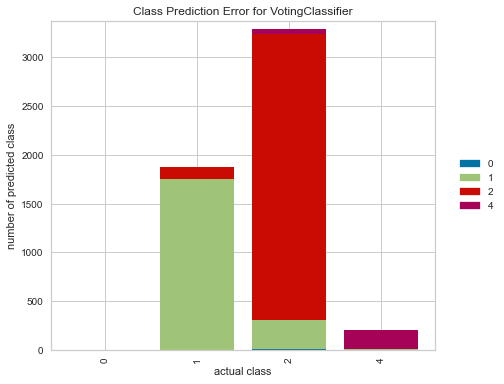

In [114]:
plot_model(catboost_pet, 'error')

In [115]:
pet_final = finalize_model(catboost_pet)

In [116]:
pet_pred = predict_model(pet_final, data=test) #predicting in test set

In [117]:
pet_pred.head()

,issue_date,listing_date,condition,color_type,height(cm),X1,X2,n1_pet_id,n2_pet_id,length(cm),ratio_len_height,date_diff,dpr,Label
0,2005-08-17,2017-09-07 15:35:00,0.0,Black,42.73,0,7,ANSL_7,ANSL_75,87.0,2.036040,4404,2163.022069,2
1,2018-11-15,2019-05-08 17:24:00,1.0,Orange Tabby,6.71,0,1,ANSL_7,ANSL_76,6.0,0.894188,174,194.590000,1
2,2012-10-11,2018-04-02 16:51:00,1.0,Black,41.21,0,7,ANSL_5,ANSL_58,24.0,0.582383,1999,3432.449583,2
3,2015-02-13,2018-04-06 07:25:00,1.0,Black,8.46,7,1,ANSL_6,ANSL_67,29.0,3.427896,1148,334.899310,2
4,2017-01-18,2018-04-26 13:42:00,1.0,Brown,30.92,0,7,ANSL_7,ANSL_72,71.0,2.296248,463,201.633239,2


In [118]:
pet_pred['Label'].value_counts()

2    4953
1    2791
4     319
0       9
Name: Label, dtype: int64

In [119]:
train['pet_category'].value_counts()

2    10621
1     7182
4      941
0       88
Name: pet_category, dtype: int64

In [120]:
y_pred_pet = pet_pred['Label'].tolist()

In [121]:
print(len(pet_id))
print(len(y_pred_breed))
print(len(y_pred_pet))

8072
8072
8072


In [122]:
pysub = pd.DataFrame({"pet_id":pet_id, "breed_category":y_pred_breed, "pet_category":y_pred_pet})

In [123]:
pysub.head()

,pet_id,breed_category,pet_category
0,ANSL_75005,1,2
1,ANSL_76663,0,1
2,ANSL_58259,0,2
3,ANSL_67171,0,2
4,ANSL_72871,0,2


In [124]:
pysub.to_csv('new_sub5.csv', index=False) #Converting dataframe to CSV file for submission